In [130]:
import lxml
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os, os.path
from lxml import etree as ET

In [131]:
VLO41_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_VLO41_annotations_Keil.csv',encoding='utf-8')
Bamberg_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Bamberg_annotations_Keil.csv',encoding='utf-8')
Lat14087_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Lat14087_annotations_Keil.csv',encoding='utf-8')
Lat7499_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Lat7499_annotations_Keil.csv',encoding='utf-8')

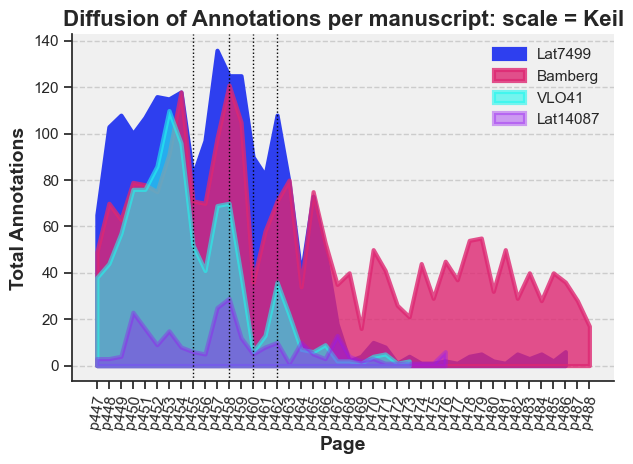

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
colors = ['#9619F3', '#DE2772', '#21F8EE', '#2E3FEF'] #'#F175AF'

# Concatenate the dataframes horizontally
merged_df = pd.concat([VLO41_diffusion_Keil['gloss'].rename('gloss_id_VLO41'), 
                       VLO41_diffusion_Keil['marginal_note_text'].rename('marginal_note_id_VLO41'),
                       Bamberg_diffusion_Keil['gloss'].rename('gloss_id_Bamberg'), 
                       Bamberg_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Bamberg'),
                       Lat14087_diffusion_Keil['gloss'].rename('gloss_id_Lat14087'),
                       Lat7499_diffusion_Keil['gloss'].rename('gloss_id_Lat7499'), 
                       Lat7499_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Lat7499')], axis=1, sort=False)

merged_df['page'] = Bamberg_diffusion_Keil['page']

# Calculate the total annotations per page by summing the values
merged_df['total_annotations_VLO41'] = merged_df['gloss_id_VLO41'] + merged_df['marginal_note_id_VLO41']
merged_df['total_annotations_Bamberg'] = merged_df['gloss_id_Bamberg'] + merged_df['marginal_note_id_Bamberg']
merged_df['total_annotations_Lat14087'] = merged_df['gloss_id_Lat14087']
merged_df['total_annotations_Lat7499'] = merged_df['gloss_id_Lat7499'] + merged_df['marginal_note_id_Lat7499']

merged_df = merged_df[['page', 'total_annotations_Lat14087', 'total_annotations_VLO41', 'total_annotations_Bamberg', 'total_annotations_Lat7499']]

# Set the style using Seaborn
sns.set(style='ticks')

# Create the area chart
plt.fill_between(merged_df['page'], merged_df['total_annotations_Lat7499'], label='Lat7499', color=colors[3], alpha=1.0, linewidth=3)
plt.fill_between(merged_df['page'], merged_df['total_annotations_Bamberg'], label='Bamberg', color=colors[1], alpha=0.8, linewidth=3)
plt.fill_between(merged_df['page'], merged_df['total_annotations_VLO41'], label='VLO41', color=colors[2], alpha=0.6, linewidth=3)
plt.fill_between(merged_df['page'], merged_df['total_annotations_Lat14087'], label='Lat14087', color=colors[0], alpha=0.4, linewidth=3)

# Set x-axis tick labels rotation
plt.xticks(rotation=80)

# Customize font size and style
plt.xlabel('Page', fontsize=14, fontweight='bold')
plt.ylabel('Total Annotations', fontsize=14, fontweight='bold')
plt.title('Diffusion of Annotations per manuscript: scale = Keil', fontsize=16, fontweight='bold')

# Customize legend
plt.legend(frameon=False)

# Set the figure background color
plt.gca().set_facecolor('#F0F0F0')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=1.0)

# Add vertical lines at specified x-axis markers
x_markers = ['p455', 'p458', 'p460', 'p462']
for marker in x_markers:
    plt.axvline(x=marker, color='black', linestyle=':', linewidth=1.0)

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig('graphs/comparative_diffusion_mss_Keil.png')


plt.show()


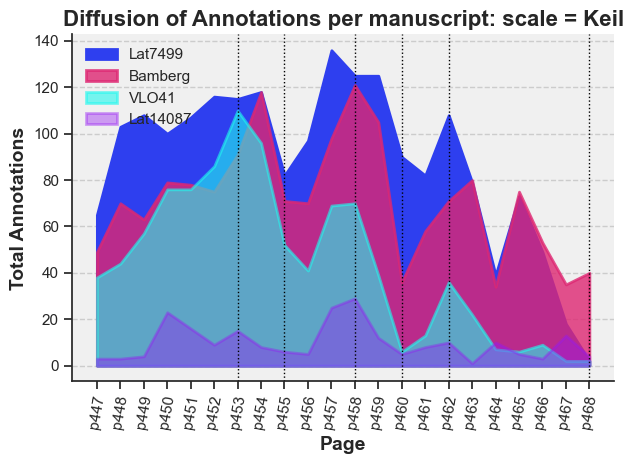

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
colors = ['#9619F3', '#DE2772', '#21F8EE', '#2E3FEF'] #'#F175AF'

# Concatenate the dataframes horizontally
merged_df = pd.concat([VLO41_diffusion_Keil['gloss'].rename('gloss_id_VLO41'), 
                       VLO41_diffusion_Keil['marginal_note_text'].rename('marginal_note_id_VLO41'),
                       Bamberg_diffusion_Keil['gloss'].rename('gloss_id_Bamberg'), 
                       Bamberg_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Bamberg'),
                       Lat14087_diffusion_Keil['gloss'].rename('gloss_id_Lat14087'),
                       Lat7499_diffusion_Keil['gloss'].rename('gloss_id_Lat7499'), 
                       Lat7499_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Lat7499')], axis=1, sort=False)

merged_df['page'] = Bamberg_diffusion_Keil['page']



# Calculate the total annotations per page by summing the values
merged_df['total_annotations_VLO41'] = merged_df['gloss_id_VLO41'] + merged_df['marginal_note_id_VLO41']
merged_df['total_annotations_Bamberg'] = merged_df['gloss_id_Bamberg'] + merged_df['marginal_note_id_Bamberg']
merged_df['total_annotations_Lat14087'] = merged_df['gloss_id_Lat14087']
merged_df['total_annotations_Lat7499'] = merged_df['gloss_id_Lat7499'] + merged_df['marginal_note_id_Lat7499']

merged_df = merged_df[['page', 'total_annotations_Lat14087', 'total_annotations_VLO41', 'total_annotations_Bamberg', 'total_annotations_Lat7499']]

# Filter the data up to 'page' 'p467'
filtered_df = merged_df[merged_df['page'] <= 'p468']

# Set the style using Seaborn
sns.set(style='ticks')

# Create the area chart using the filtered dataframe
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_Lat7499'], label='Lat7499', color=colors[3], alpha=1.0, linewidth=2)
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_Bamberg'], label='Bamberg', color=colors[1], alpha=0.8, linewidth=2)
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_VLO41'], label='VLO41', color=colors[2], alpha=0.6, linewidth=2)
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_Lat14087'], label='Lat14087', color=colors[0], alpha=0.4, linewidth=2)

# Set x-axis tick labels rotation
plt.xticks(rotation=80)

# Customize font size and style
plt.xlabel('Page', fontsize=14, fontweight='bold')
plt.ylabel('Total Annotations', fontsize=14, fontweight='bold')
plt.title('Diffusion of Annotations per manuscript: scale = Keil', fontsize=16, fontweight='bold')

# Customize legend
plt.legend(frameon=False)

# Set the figure background color
plt.gca().set_facecolor('#F0F0F0')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=1.0)

# Add vertical lines at specified x-axis markers
x_markers = ['p453','p455', 'p458', 'p460', 'p462', 'p468']
for marker in x_markers:
    plt.axvline(x=marker, color='black', linestyle=':', linewidth=1.0)

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig('graphs/comparative_diffusion_mss_Keil_firstbook.png')


plt.show()


In [134]:
VLO41 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/VLO41.csv',encoding='utf-8')
Bamberg = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Bamberg.csv',encoding='utf-8')
Lat14087 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Lat14087.csv',encoding='utf-8')
Lat7499 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Lat7499.csv',encoding='utf-8')

### Let's start by making one by one comparative applications on typology and form to pairs of manuscritps and then merge everything together

In [135]:
merged_df_VLO_Bamberg = pd.merge(VLO41, Bamberg, on='lemma_id', suffixes=('_VLO41', '_Bamberg'))
merged_df_VLO_Bamberg

,lemma_id,folio_VLO41,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_text,marginal_type,marginal_form,folio_Bamberg,lemma_Bamberg,gloss_id,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id,marginal_note_type,marginal_note_form
0,p447_l01_o00,02r,INCIPIT LIBER EVTI/CI GRAMMAT(I)CI /DE VERBO,NaN,NaN,NaN,++++/de uer[bo] ++++/[bo]nus contextor,S523,F4,71r,EVTICII,NaN,NaN,NaN,NaN,NaN,p447_l01_o00_a,S54,F5
1,p447_l05_o02,02r,semper,s. cũ frequentia,S23,F3,NaN,NaN,NaN,71r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,normal,NaN,NaN,NaN
2,p447_l05_o04,02r,nouas quaestiones,novẽ int̃rogaciones,S22,F3,NaN,NaN,NaN,71r,QVĘSTIONES,p447_l05_o04_a,ꝓ positiones,S22,F2,shorthand,NaN,NaN,NaN
3,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,71r,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,normal,NaN,NaN,NaN
4,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,71r,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,p470_l23_o05,22r,bacchor,furo ł insanior,S22,F3,NaN,NaN,NaN,80r,Bacchor,p470_l23_o05_a,insanio,S22,F2,shorthand,p470_l23_o05_b,S63,F2
561,p471_l03_o08,22r,foedus,turpis,S22,F2,NaN,NaN,NaN,80r,Fedus,p471_l03_o08_a,turpis,S22,F2,normal,NaN,NaN,NaN
562,p471_l26_o01,22v,trudo,impello,S22,F2,NaN,NaN,NaN,80r,Trudo,p471_l26_o01_a,indudo,S22,F2,normal,NaN,NaN,NaN
563,p476_l07_o09,25r,pango,NaN,NaN,NaN,ille poematu pconpanpango oratius epistularum ...,S72,F4,81v,pango,p476_l07_o09_a,cõpono,S22,F2,shorthand,p476_l07_o09_b,S63,F2


In [136]:
# Filter the rows where the conditions are met
common_VLO41_Bamberg = merged_df_VLO_Bamberg[
    (merged_df_VLO_Bamberg['gloss_type_VLO41'] == merged_df_VLO_Bamberg['gloss_type_Bamberg']) &
    ((merged_df_VLO_Bamberg['gloss_form_VLO41'] == merged_df_VLO_Bamberg['gloss_form_Bamberg']) |
    (merged_df_VLO_Bamberg['marginal_type'] == merged_df_VLO_Bamberg['marginal_note_type']))
]

# Select the desired columns
common_VLO41_Bamberg = common_VLO41_Bamberg[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Bamberg',
                                             'gloss_form_VLO41', 'gloss_form_Bamberg']]

# Merge with merged_df_VLO41_Bamberg to get 'lemma_VLO41' and 'lemma_Bamberg'
common_VLO41_Bamberg = common_VLO41_Bamberg.merge(merged_df_VLO_Bamberg[['lemma_id', 'lemma_VLO41', 'gloss_VLO41', 'lemma_Bamberg', 'gloss_Bamberg']],
                                                  on='lemma_id', how='left')

# Display the new DataFrame
common_VLO41_Bamberg.to_csv('identical_glosses_csv/identical_glosses_VLO41_Bamberg.csv')
common_VLO41_Bamberg

,lemma_id,gloss_type_VLO41,gloss_type_Bamberg,gloss_form_VLO41,gloss_form_Bamberg,lemma_VLO41,gloss_VLO41,lemma_Bamberg,gloss_Bamberg
0,p447_l05_o05,S22,S22,F2,F2,doctorib;,p̃ce<ptoribus>,DOCTORIBVS,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ
1,p447_l05_o06,S22,S22,F2,F2,auditorum,iđ discipulorũ,AVDITORVM,discipulorũ
2,p447_l05_o08,S22,S22,F2,F2,cõmouere,reperire et excitare,comouere,incitare
3,p447_l06_o05,S22,S22,F2,F2,curiositas,qͣsi sollicitudo,curiositas,(a cora) sagax sollicitudo
4,p447_l07_o01,S22,S22,F2,F2,desiderat,cupit,desider&,c̃cupiscat
...,...,...,...,...,...,...,...,...,...
248,p466_l22_o02,S22,S22,F2,F2,adipiscor,inueniscor,adipiscor,consequor
249,p468_l15_o10,S22,S22,F2,F2,neco,interficio,neco,int̃ficio
250,p470_l09_o07,S22,S22,F2,F2,glisco,cresco,Glisco,cresco
251,p471_l03_o08,S22,S22,F2,F2,foedus,turpis,Fedus,turpis


In [137]:
merged_df_VLO_Bamberg['page'] = merged_df_VLO_Bamberg['lemma_id'].str.extract(r'(p\d+)')
subset_VLO41Bamberg = merged_df_VLO_Bamberg[['page','lemma_id', 'gloss_form_VLO41','gloss_form_Bamberg']]
subset_VLO41Bamberg = subset_VLO41Bamberg.dropna()

# Convert F1-5 to numerical values 1-5
subset_VLO41Bamberg['gloss_form_VLO41'] = subset_VLO41Bamberg['gloss_form_VLO41'].str.extract('(\d)').astype(int)
subset_VLO41Bamberg['gloss_form_Bamberg'] = subset_VLO41Bamberg['gloss_form_Bamberg'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_VLO41Bamberg['gloss_form_VLO41'] == subset_VLO41Bamberg['gloss_form_Bamberg']).mean()
increase_ratio = (subset_VLO41Bamberg['gloss_form_VLO41'] < subset_VLO41Bamberg['gloss_form_Bamberg']).mean()
decrease_ratio = (subset_VLO41Bamberg['gloss_form_VLO41'] > subset_VLO41Bamberg['gloss_form_Bamberg']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 55.17%
Increase Ratio: 20.88%
Decrease Ratio: 23.95%


### More can be done, but let's move to the next one 

In [138]:
merged_df_VLO_Lat7499 = pd.merge(VLO41, Lat7499, on='lemma_id', suffixes=('_VLO41', '_Lat7499'))
merged_df_VLO_Lat7499

,lemma_id,folio_VLO41,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_text,marginal_type,marginal_form,folio_Lat7499,lemma_Lat7499,gloss_id,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id,marginal_note_type,marginal_note_form
0,p447_l01_o00,02r,INCIPIT LIBER EVTI/CI GRAMMAT(I)CI /DE VERBO,NaN,NaN,NaN,++++/de uer[bo] ++++/[bo]nus contextor,S523,F4,73r,EVTICII,p447_l01_o00_a,Eutex euticis. Inde euticius eutici,S54,F3,NaN,NaN,NaN
1,p447_l05_o02,02r,semper,s. cũ frequentia,S23,F3,NaN,NaN,NaN,73r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,p447_l05_o02_b,S23,F5
2,p447_l05_o04,02r,nouas quaestiones,novẽ int̃rogaciones,S22,F3,NaN,NaN,NaN,73r,QVESTIONES,p447_l05_o04_a,÷ ꝓpositiones,S22,F2,p447_l05_o04_b,S631,F5
3,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
4,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,p466_l06_o03,18v,rimor,ꝑscrutor,S22,F2,NaN,NaN,NaN,84v,Rimor,p466_l06_o03_a,inqͥro,S22,F2,NaN,NaN,NaN
641,p466_l21_o09,19r,paciscor,pactũ facio,S22,F2,NaN,NaN,NaN,84v,pacisor,p466_l21_o09_a,pacẽ fatio,S23,F4,NaN,NaN,NaN
642,p466_l22_o02,19r,adipiscor,inueniscor,S22,F2,NaN,NaN,NaN,84v,Adipiscor;,p466_l22_o02_a,consequor inuenio,S22,F3,NaN,NaN,NaN
643,p470_l09_o07,21v,glisco,cresco,S22,F2,NaN,NaN,NaN,85v,"Glisco,",p470_l09_o07_a,cresco,S22,F2,NaN,NaN,NaN


In [139]:
# Filter the rows where the conditions are met
common_VLO41_Lat7499 = merged_df_VLO_Lat7499[
    (merged_df_VLO_Lat7499['gloss_type_VLO41'] == merged_df_VLO_Lat7499['gloss_type_Lat7499']) &
    ((merged_df_VLO_Lat7499['gloss_form_VLO41'] == merged_df_VLO_Lat7499['gloss_form_Lat7499']) |
    (merged_df_VLO_Lat7499['marginal_type'] == merged_df_VLO_Lat7499['marginal_note_type']))
]

# Select the desired columns
common_VLO41_Lat7499 = common_VLO41_Lat7499[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Lat7499',
                                             'gloss_form_VLO41', 'gloss_form_Lat7499']]

# Merge with merged_df_VLO41_Bamberg to get 'lemma_VLO41' and 'lemma_Bamberg'
common_VLO41_Lat7499 = common_VLO41_Lat7499.merge(merged_df_VLO_Lat7499[['lemma_id', 'lemma_VLO41', 'gloss_VLO41', 'lemma_Lat7499', 'gloss_Lat7499']],
                                                  on='lemma_id', how='left')

# Display the new DataFrame
common_VLO41_Lat7499.to_csv('identical_glosses_csv/identical_glosses_VLO41_Lat7499.csv')
common_VLO41_Lat7499

,lemma_id,gloss_type_VLO41,gloss_type_Lat7499,gloss_form_VLO41,gloss_form_Lat7499,lemma_VLO41,gloss_VLO41,lemma_Lat7499,gloss_Lat7499
0,p447_l05_o06,S22,S22,F2,F2,auditorum,iđ discipulorũ,AVDITORṼ,discipuloꝵ
1,p447_l07_o01,S22,S22,F2,F2,desiderat,cupit,desideret,.s. audire
2,p447_l07_o03,S22,S22,F2,F2,recens,nouit(er),recens,Nouũ
3,p447_l09_o05,S553,S553,F3,F3,Cratere,nom̃ ꝓpͥũ,CRATERE,ꝓpͥũ nom̃
4,p447_l10_o01,S22,S22,F3,F3,facundia,iđ doctrina /eloquentia,facundia,÷ eloquentia lepore
...,...,...,...,...,...,...,...,...,...
218,p463_l15_o03,S22,S22,F2,F2,insignis,nobilis,in̶asignis,nobilis
219,p463_l25_o09,S22,S22,F2,F2,metior,mensuro,metior,÷ mensuro
220,p464_l13_o09,S22,S22,F2,F2,eger,infirmus,ager,infirmꝰ
221,p466_l06_o03,S22,S22,F2,F2,rimor,ꝑscrutor,Rimor,inqͥro


In [140]:
merged_df_VLO_Lat7499['page'] = merged_df_VLO_Lat7499['lemma_id'].str.extract(r'(p\d+)')
subset_VLO41Lat7499 = merged_df_VLO_Lat7499[['page','lemma_id', 'gloss_form_VLO41','gloss_form_Lat7499']]
subset_VLO41Lat7499 = subset_VLO41Lat7499.dropna()

# Convert F1-5 to numerical values 1-5
subset_VLO41Lat7499['gloss_form_VLO41'] = subset_VLO41Lat7499['gloss_form_VLO41'].str.extract('(\d)').astype(int)
subset_VLO41Lat7499['gloss_form_Lat7499'] = subset_VLO41Lat7499['gloss_form_Lat7499'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_VLO41Lat7499['gloss_form_VLO41'] == subset_VLO41Lat7499['gloss_form_Lat7499']).mean()
increase_ratio = (subset_VLO41Lat7499['gloss_form_VLO41'] < subset_VLO41Lat7499['gloss_form_Lat7499']).mean()
decrease_ratio = (subset_VLO41Lat7499['gloss_form_VLO41'] > subset_VLO41Lat7499['gloss_form_Lat7499']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 46.17%
Increase Ratio: 40.17%
Decrease Ratio: 13.67%


### More can be done, but let's move to the next one 

In [141]:
merged_df_VLO_Lat14087 = pd.merge(VLO41, Lat14087, on='lemma_id', suffixes=('_VLO41', '_Lat14087'))
merged_df_VLO_Lat14087

,lemma_id,folio,lemma,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_text,marginal_type,marginal_form,gloss_Lat14087,gloss_type_Lat14087,gloss_form_Lat14087
0,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,Preceptor. doctor ł magifter,S22,F3
1,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,Adiutor/ discipulus,S23,F2
2,p447_l18_o05,02r,BARIΘONOC,grauis sonus,S211,F3,NaN,NaN,NaN,Barithonos/Aliena atona,S23,F3
3,p448_l02_o08,02r,ΠE/ΡΙCΠΟΜΕΝΕ,ꝑicpomene circũflexibilis,S211,F2,NaN,NaN,NaN,Perspomene. quasi circũ flexo,S211,F3
4,p448_l20_o07,02v,sodes,si audes,S23,F3,NaN,NaN,NaN,si audes,S25,F3
...,...,...,...,...,...,...,...,...,...,...,...,...
137,p465_l28_o07,18r,amitior,tego,S22,F2,NaN,NaN,NaN,Amicior . Vestio circũdo induo togo,S22,F3
138,p466_l05_o04,18v,uador,error,S22,F2,NaN,NaN,NaN,Vador. ꝓmitto. causã ago. fidẽ fatio,S23,F4
139,p466_l21_o09,19r,paciscor,pactũ facio,S22,F2,NaN,NaN,NaN,Pasciscor pacẽ redintegror,S23,F4
140,p466_l22_o02,19r,adipiscor,inueniscor,S22,F2,NaN,NaN,NaN,Adipiscor conor / Nasiciscor Adipiscor Assequor,S22,F3


In [142]:
# Filter the rows where the conditions are met
common_VLO41_Lat14087 = merged_df_VLO_Lat14087[
    (merged_df_VLO_Lat14087['gloss_type_VLO41'] == merged_df_VLO_Lat14087['gloss_type_Lat14087']) &
    ((merged_df_VLO_Lat14087['gloss_form_VLO41'] == merged_df_VLO_Lat14087['gloss_form_Lat14087']))
]

# Select the desired columns
common_VLO41_Lat14087 = common_VLO41_Lat14087[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Lat14087',
                                             'gloss_form_VLO41', 'gloss_form_Lat14087']]

# Merge with merged_df_VLO41_Bamberg to get 'lemma_VLO41' and 'lemma_Bamberg'
common_VLO41_Lat14087 = common_VLO41_Lat14087.merge(merged_df_VLO_Lat14087[['lemma_id', 'lemma', 'gloss_VLO41', 'gloss_Lat14087']],
                                                  on='lemma_id', how='left')

# Display the new DataFrame
common_VLO41_Lat14087.to_csv('identical_glosses_csv/identical_glosses_VLO41_Lat14087.csv')
common_VLO41_Lat14087

,lemma_id,gloss_type_VLO41,gloss_type_Lat14087,gloss_form_VLO41,gloss_form_Lat14087,lemma,gloss_VLO41,gloss_Lat14087
0,p450_l02_o04,S22,S22,F2,F2,enucleo,aperio,Nucleo. claudo
1,p450_l06_o07,S22,S22,F2,F2,fatuo,desinio,fatuor hebesco
2,p450_l06_o09,S22,S22,F2,F2,liquor,soluor/ fluor,Liquor humor
3,p450_l26_o01,S22,S22,F3,F3,pio,purgo/mundo,Pio purgo placo
4,p451_l11_o04,S22,S22,F3,F3,insignio,orno/redimio,insignior. orno. nobilito
5,p451_l12_o02,S22,S22,F2,F2,Sopio,dormio,Sopio Dormio
6,p451_l12_o03,S22,S22,F2,F2,Ferio,ꝑcucio,Exsicco ł ferio
7,p451_l12_o07,S22,S22,F2,F2,Ligurrio,lango ł gusto.,Ligurrio deglutio
8,p451_l22_o06,S22,S22,F2,F2,fodio,ꝑforo,fodio ł colligo
9,p451_l23_o05,S22,S22,F2,F2,potior,utor,Potior fruor


In [143]:
merged_df_VLO_Lat14087['page'] = merged_df_VLO_Lat14087['lemma_id'].str.extract(r'(p\d+)')
subset_VLO41Lat14087 = merged_df_VLO_Lat14087[['page','lemma_id', 'gloss_form_VLO41','gloss_form_Lat14087']]
subset_VLO41Lat14087 = subset_VLO41Lat14087.dropna()

# Convert F1-5 to numerical values 1-5
subset_VLO41Lat14087['gloss_form_VLO41'] = subset_VLO41Lat14087['gloss_form_VLO41'].str.extract('(\d)').astype(int)
subset_VLO41Lat14087['gloss_form_Lat14087'] = subset_VLO41Lat14087['gloss_form_Lat14087'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_VLO41Lat14087['gloss_form_VLO41'] == subset_VLO41Lat14087['gloss_form_Lat14087']).mean()
increase_ratio = (subset_VLO41Lat14087['gloss_form_VLO41'] < subset_VLO41Lat14087['gloss_form_Lat14087']).mean()
decrease_ratio = (subset_VLO41Lat14087['gloss_form_VLO41'] > subset_VLO41Lat14087['gloss_form_Lat14087']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 36.96%
Increase Ratio: 48.55%
Decrease Ratio: 14.49%


### More can be done, but let's move to the next one 

In [144]:
merged_df_Bamberg_Lat7499 = pd.merge(Bamberg, Lat7499, on='lemma_id', suffixes=('_Bamberg', '_Lat7499'))
merged_df_Bamberg_Lat7499

,folio_Bamberg,lemma_id,lemma_Bamberg,gloss_id_Bamberg,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id_Bamberg,marginal_note_type_Bamberg,marginal_note_form_Bamberg,folio_Lat7499,lemma_Lat7499,gloss_id_Lat7499,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id_Lat7499,marginal_note_type_Lat7499,marginal_note_form_Lat7499
0,71r,p447_l01_o00,EVTICII,NaN,NaN,NaN,NaN,NaN,p447_l01_o00_a,S54,F5,73r,EVTICII,p447_l01_o00_a,Eutex euticis. Inde euticius eutici,S54,F3,NaN,NaN,NaN
1,71r,p447_l05_o02,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,normal,NaN,NaN,NaN,73r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,p447_l05_o02_b,S23,F5
2,71r,p447_l05_o04,QVĘSTIONES,p447_l05_o04_a,ꝓ positiones,S22,F2,shorthand,NaN,NaN,NaN,73r,QVESTIONES,p447_l05_o04_a,÷ ꝓpositiones,S22,F2,p447_l05_o04_b,S631,F5
3,71r,p447_l05_o05,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,normal,NaN,NaN,NaN,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
4,71r,p447_l05_o06,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,83r,p482_l11_o01-02,in .ror.,NaN,NaN,NaN,NaN,NaN,p482_l11_o01-02_a,S63,F3,89v,in .ror.,NaN,NaN,NaN,NaN,p482_l14_o01-02_a,S63,F1
1099,83r,p482_l14_o01-02,in .so.,NaN,NaN,NaN,NaN,NaN,p482_l14_o01-02_a,S63,F3,89v,In .so.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100,83v,p483_l20_o04,"Exulto,",p483_l20_o04_a,l&or,S22,F2,normal,NaN,NaN,NaN,90r,exultat,p483_l20_o04_a,s,S611,F1,NaN,NaN,NaN
1101,84r,p485_l20_o04-05,in .xor.,NaN,NaN,NaN,NaN,NaN,p485_l20_o04-05_a,S63,F2,90v,\n In .xor.,NaN,NaN,NaN,NaN,p485_l20_o04-05_a,S63,F3


In [145]:
# Filter the rows where the conditions are met
common_Bamberg_Lat7499 = merged_df_Bamberg_Lat7499[
    (merged_df_Bamberg_Lat7499['gloss_type_Bamberg'] == merged_df_Bamberg_Lat7499['gloss_type_Lat7499']) &
    ((merged_df_Bamberg_Lat7499['gloss_form_Bamberg'] == merged_df_Bamberg_Lat7499['gloss_form_Lat7499']) |
    (merged_df_Bamberg_Lat7499['marginal_note_type_Bamberg'] == merged_df_Bamberg_Lat7499['marginal_note_type_Lat7499']))
]

# Select the desired columns
common_Bamberg_Lat7499 = common_Bamberg_Lat7499[['lemma_id', 'gloss_type_Bamberg', 'gloss_type_Lat7499',
                                             'gloss_form_Bamberg', 'gloss_form_Lat7499']]

# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_Bamberg_Lat7499 = common_Bamberg_Lat7499.merge(merged_df_Bamberg_Lat7499[['lemma_id', 'lemma_Bamberg', 'gloss_Bamberg', 'lemma_Lat7499', 'gloss_Lat7499']],
                                                  on='lemma_id', how='left')

# Save the result as a CSV file
common_Bamberg_Lat7499.to_csv('identical_glosses_csv/identical_glosses_Bamberg_Lat7499.csv', index=False)

# Display the new DataFrame
common_Bamberg_Lat7499


,lemma_id,gloss_type_Bamberg,gloss_type_Lat7499,gloss_form_Bamberg,gloss_form_Lat7499,lemma_Bamberg,gloss_Bamberg,lemma_Lat7499,gloss_Lat7499
0,p447_l05_o02,S22,S22,F2,F2,SEMPER,ꝓ sepe,SEMPER,ꝓ sepe
1,p447_l05_o04,S22,S22,F2,F2,QVĘSTIONES,ꝓ positiones,QVESTIONES,÷ ꝓpositiones
2,p447_l05_o06,S22,S22,F2,F2,AVDITORVM,discipulorũ,AVDITORṼ,discipuloꝵ
3,p447_l05_o07,S22,S22,F3,F3,ACVTIora,peritiora astutiora /subtiliora VALᵈ ͤ <...?>/...,acutiora,"efficatiora ÷ ualde acuta, peritiora acutiora ..."
4,p447_l07_o01,S22,S22,F2,F2,desider&,c̃cupiscat,desideret,.s. audire
...,...,...,...,...,...,...,...,...,...
509,p472_l09_o01,S22,S22,F2,F2,cedt̃,uerberare,cędunt,uerberant
510,p473_l01_o01,S22,S22,F2,F2,Secundus,prosꝑ,Secunđ,÷ ꝓsꝑ
511,p474_l18_o08,S22,S22,F2,F2,no,nato,no,nato
512,p474_l19_o04,S22,S22,F2,F2,for,loquor,for,loquor


In [146]:
merged_df_Bamberg_Lat7499['page'] = merged_df_Bamberg_Lat7499['lemma_id'].str.extract(r'(p\d+)')
subset_BambergLat7499 = merged_df_Bamberg_Lat7499[['page','lemma_id', 'gloss_form_Lat7499', 'gloss_form_Bamberg']]
subset_BambergLat7499 = subset_BambergLat7499.dropna()
#subset_BambergLat7499

# Convert F1-5 to numerical values 1-5
subset_BambergLat7499['gloss_form_Bamberg'] = subset_BambergLat7499['gloss_form_Bamberg'].str.extract('(\d)').astype(int)
subset_BambergLat7499['gloss_form_Lat7499'] = subset_BambergLat7499['gloss_form_Lat7499'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_BambergLat7499['gloss_form_Bamberg'] == subset_BambergLat7499['gloss_form_Lat7499']).mean()
increase_ratio = (subset_BambergLat7499['gloss_form_Bamberg'] < subset_BambergLat7499['gloss_form_Lat7499']).mean()
decrease_ratio = (subset_BambergLat7499['gloss_form_Bamberg'] > subset_BambergLat7499['gloss_form_Lat7499']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 56.98%
Increase Ratio: 36.09%
Decrease Ratio: 6.93%


### More can be done, but let's move to the next one 


In [147]:
merged_df_Bamberg_Lat14087 = pd.merge(Bamberg, Lat14087, on='lemma_id', suffixes=('_Bamberg', '_Lat14087'))
merged_df_Bamberg_Lat14087

,folio,lemma_id,lemma,gloss_id,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id,marginal_note_type,marginal_note_form,gloss_Lat14087,gloss_type_Lat14087,gloss_form_Lat14087
0,71r,p447_l05_o05,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,normal,NaN,NaN,NaN,Preceptor. doctor ł magifter,S22,F3
1,71r,p447_l05_o06,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN,Adiutor/ discipulus,S23,F2
2,71r,p447_l18_o05,barutonos,p447_l18_o05_a,bari apud g̃cos dr̃ grauis tonos accentꝰ inde/...,S211,F4,normal,NaN,NaN,NaN,Barithonos/Aliena atona,S23,F3
3,71r,p448_l02_o08,ꝑispomene,p448_l02_o08_a,peri DIC ͥ ͭ ͧ ͬ circũ UNDE perispomene IDEST...,S211,F4,shorthand,NaN,NaN,NaN,Perspomene. quasi circũ flexo,S211,F3
4,71r,p448_l20_o07,"sodes,",p448_l20_o07_a,si audes,S25,F3,normal,NaN,NaN,NaN,si audes,S25,F3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,80r,p471_l06_o01,delapido,p471_l06_o01_a,defraudo,S22,F2,shorthand,p471_l06_o01_b,S63,F2,Delapido Erogo ꝓdico ꝑdo exhaurio consumo sup...,S22,F3
161,80r,p471_l17_o02,Rodo,p471_l17_o02_a,deuoro,S22,F2,normal,NaN,NaN,NaN,Rodo mordeo,S22,F2
162,82v,p480_l15_o11,aucupor,p480_l15_o11_a,uenare ł aues capio,S23,F4,shorthand,p480_l15_o11_b,S63,F3,Aucupor affecto. lnsdior Adipiscor conor.,S22,F3
163,83r,p481_l09_o03,lacero,p481_l09_o03_a,lanio,S22,F2,normal,NaN,NaN,NaN,lacero ł iterimo,S22,F2


In [151]:
# Filter the rows where the conditions are met
common_Bamberg_Lat14087 = merged_df_Bamberg_Lat14087[
    (merged_df_Bamberg_Lat14087['gloss_type_Bamberg'] == merged_df_Bamberg_Lat14087['gloss_type_Lat14087']) &
    ((merged_df_Bamberg_Lat14087['gloss_form_Bamberg'] == merged_df_Bamberg_Lat14087['gloss_form_Lat14087']) )
]

# Select the desired columns
common_Bamberg_Lat14087 = common_Bamberg_Lat14087[['lemma_id', 'gloss_type_Bamberg', 'gloss_type_Lat14087',
                                             'gloss_form_Bamberg', 'gloss_form_Lat14087']]

# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_Bamberg_Lat14087 = common_Bamberg_Lat14087.merge(merged_df_Bamberg_Lat14087[['lemma_id', 'lemma', 'gloss_Bamberg', 'gloss_Lat14087']],
                                                  on='lemma_id', how='left')

# Save the result as a CSV file
common_Bamberg_Lat14087.to_csv('identical_glosses_csv/identical_glosses_Bamberg_Lat14087.csv', index=False)

# Display the new DataFrame
common_Bamberg_Lat14087

,lemma_id,gloss_type_Bamberg,gloss_type_Lat14087,gloss_form_Bamberg,gloss_form_Lat14087,lemma,gloss_Bamberg,gloss_Lat14087
0,p448_l20_o07,S25,S25,F3,F3,"sodes,",si audes,si audes
1,p450_l02_o04,S22,S22,F2,F2,enucleo,manifesto,Nucleo. claudo
2,p450_l06_o07,S22,S22,F2,F2,"fatuo,",hębeo,fatuor hebesco
3,p450_l20_o04,S22,S22,F2,F2,"delinio,",blandior,Delinior blandior
4,p451_l10_o02,S23,S23,F4,F4,"pręsagio,",futura p̃dico,P̃dico. cis. futura. antedico . P̃dico cas; de...
5,p451_l12_o02,S22,S22,F2,F2,"sopio,",dormio,Sopio Dormio
6,p451_l12_o03,S22,S22,F2,F2,"ferio,",ꝑcutio,Exsicco ł ferio
7,p451_l12_o07,S22,S22,F2,F2,"ligurrio,",lingo,Ligurrio deglutio
8,p451_l23_o05,S22,S22,F2,F2,potior,fruor,Potior fruor
9,p452_l21_o01,S22,S22,F2,F2,Obsequor,obtẽpero,Obsequor famulor


In [155]:
# Convert gloss_form_Lat14087 to integer values
subset_BambergLat14087['gloss_form_Lat14087'] = subset_BambergLat14087['gloss_form_Lat14087'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_BambergLat14087['gloss_form_Bamberg'] == subset_BambergLat14087['gloss_form_Lat14087']).mean()
increase_ratio = (subset_BambergLat14087['gloss_form_Bamberg'] < subset_BambergLat14087['gloss_form_Lat14087']).mean()
decrease_ratio = (subset_BambergLat14087['gloss_form_Bamberg'] > subset_BambergLat14087['gloss_form_Lat14087']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))


Stable Ratio: 36.94%
Increase Ratio: 52.23%
Decrease Ratio: 10.83%


### More can be done, but let's move to the next one 


In [156]:
merged_df_Lat14087_Lat7499 = pd.merge(Lat14087, Lat7499, on='lemma_id', suffixes=('_Lat14087', '_Lat7499'))
merged_df_Lat14087_Lat7499

,lemma_id,gloss_Lat14087,gloss_type_Lat14087,gloss_form_Lat14087,folio,lemma,gloss_id,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id,marginal_note_type,marginal_note_form
0,p447_l05_o05,Preceptor. doctor ł magifter,S22,F3,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
1,p447_l05_o06,Adiutor/ discipulus,S23,F2,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
2,p447_l18_o05,Barithonos/Aliena atona,S23,F3,73r,ΒΑΡΙΤΟΝΑ,p447_l18_o05_a,grauisona,S211,F2,NaN,NaN,NaN
3,p448_l02_o08,Perspomene. quasi circũ flexo,S211,F3,73r,ΠΕΡΙCΠΩΜΕΝΗ,p448_l02_o08_a,cirũflexibils; ΠΕΡΙCΠΩ ÷ circũfleto/ΠΕΡΙ dr̃ c...,S211,F4,NaN,NaN,NaN
4,p448_l20_o07,si audes,S25,F3,73v,"Sodes,",p448_l20_o07_a,si audes,S25,F3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,p466_l21_o09,Pasciscor pacẽ redintegror,S23,F4,84v,pacisor,p466_l21_o09_a,pacẽ fatio,S23,F4,NaN,NaN,NaN
164,p466_l22_o02,Adipiscor conor / Nasiciscor Adipiscor Assequor,S22,F3,84v,Adipiscor;,p466_l22_o02_a,consequor inuenio,S22,F3,NaN,NaN,NaN
165,p467_l07_o05,Neo filator queo,S22,F3,84v,neo,p467_l07_o05_a,filo,S22,F2,NaN,NaN,NaN
166,p468_l34_o08,edico cis p̃dico p̃nuntio ł p̃cipio,S22,F3,85v,Edico,p468_l34_o08_a,ualde dico,S23,F4,NaN,NaN,NaN


In [176]:
# Filter the rows where the conditions are met
common_Lat14087_Lat7499 = merged_df_Lat14087_Lat7499[
    (merged_df_Lat14087_Lat7499['gloss_type_Lat14087'] == merged_df_Lat14087_Lat7499['gloss_type_Lat7499']) &
    ((merged_df_Lat14087_Lat7499['gloss_form_Lat14087'] == merged_df_Lat14087_Lat7499['gloss_form_Lat7499']) )
]

common_Lat14087_Lat7499

# Select the desired columns
common_Lat14087_Lat7499 = common_Lat14087_Lat7499[['lemma_id', 'gloss_type_Lat14087', 'gloss_type_Lat7499',
                                             'gloss_form_Lat14087', 'gloss_form_Lat7499']]


# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_Lat14087_Lat7499 = common_Lat14087_Lat7499.merge(merged_df_Lat14087_Lat7499[['lemma_id', 'lemma', 'gloss_Lat14087', 'gloss_Lat7499']],
                                                  on='lemma_id', how='left')

# Save the result as a CSV file
common_Lat14087_Lat7499.to_csv('identical_glosses_csv/identical_glosses_Lat14087Lat7499.csv', index=False)

# Display the new DataFrame
common_Lat14087_Lat7499

,lemma_id,gloss_type_Lat14087,gloss_type_Lat7499,gloss_form_Lat14087,gloss_form_Lat7499,lemma,gloss_Lat14087,gloss_Lat7499
0,p447_l05_o05,S22,S22,F3,F3,DOCTORIB,Preceptor. doctor ł magifter,magistris p̃ceptorib
1,p448_l20_o07,S25,S25,F3,F3,"Sodes,",si audes,si audes
2,p449_l12_o03,S553,S553,F3,F3,protheus,ꝓtheus pastor quidã,ꝓpũ nom̃
3,p450_l02_o01,S22,S22,F3,F3,"Meo,",Defluo Decurro mano,transeo/ãbulo
4,p450_l20_o04,S22,S22,F2,F2,Delinio,Delinior blandior,blandior
5,p450_l22_o07,S23,S23,F3,F3,Depretio,Deprecio / uilẽfacio,uilẽ facio
6,p451_l12_o03,S22,S22,F2,F2,Ferio,Exsicco ł ferio,ꝑcutio
7,p451_l13_o03,S22,S22,F2,F2,Haurio,Haurio.Euacuo,ꝓpino
8,p451_l23_o05,S22,S22,F2,F2,potior,Potior fruor,possideo
9,p452_l18_o07,S22,S22,F3,F3,Pręsideo,P̃sideo ꝓtego subleuo opitulor. suffragor ł ꝓp...,antesedeo/seu pręsum
